In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.figsize"] = [9, 6]

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_excel('data/v3.xlsx')

In [3]:
df.head()

df = df.iloc[1:, :]
df.head()

,day_of_week,hour0,hour1,hour10,hour11,hour12,hour13,hour14,hour15,hour16,hour17,hour18,hour19,hour2,hour20,...,hour41,hour42,hour43,hour44,hour45,hour46,hour47,hour5,hour6,hour7,hour8,hour9,hour_of_day,sum_costs,tgmessageid
0,int32,double,double,double,double,double,double,double,double,double,double,double,double,double,double,...,double,double,double,double,double,double,double,double,double,double,double,double,int32,double,uint64
1,4,103.18888983050849,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,13,103.18888983050849,5204324492772146346
2,5,120.006,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,8,120.006,2452480919034167719
3,1,873.4562288135595,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,16,873.4562288135595,3720607263194773822
4,2,1146.5947372881358,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,15,1146.5947372881358,17785924568519341456


,day_of_week,hour0,hour1,hour10,hour11,hour12,hour13,hour14,hour15,hour16,hour17,hour18,hour19,hour2,hour20,...,hour41,hour42,hour43,hour44,hour45,hour46,hour47,hour5,hour6,hour7,hour8,hour9,hour_of_day,sum_costs,tgmessageid
1,4,103.18888983050849,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,13,103.18888983050849,5204324492772146346
2,5,120.006,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,8,120.006,2452480919034167719
3,1,873.4562288135595,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,16,873.4562288135595,3720607263194773822
4,2,1146.5947372881358,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,15,1146.5947372881358,17785924568519341456
5,7,273.43271186440677,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,16,273.43271186440677,8686137824804867261


In [36]:
hour_columns = ['hour' + str(idx) for idx in range(48)]
bruh = np.sum(df[hour_columns] != 0, axis=1)
bruh.describe()

count    14316.000000
mean         5.765088
std          5.249506
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         42.000000
dtype: float64

In [40]:
df_share = df.copy()

# df_share = df_share.iloc[:20]

df_share[[*hour_columns, 'sum_costs']] = df_share[[*hour_columns, 'sum_costs']].astype(np.float64)

df_share[hour_columns] = df_share[hour_columns].divide(df_share['sum_costs'], axis=0)

In [41]:
df_share.head()

,day_of_week,hour0,hour1,hour10,hour11,hour12,hour13,hour14,hour15,hour16,hour17,hour18,hour19,hour2,hour20,...,hour40,hour41,hour42,hour43,hour44,hour45,hour46,hour47,hour5,hour6,hour7,hour8,hour9,sum_costs,tgmessageid
1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.188890,5204324492772146346
2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.006000,2452480919034167719
3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,873.456229,3720607263194773822
4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1146.594737,17785924568519341456
5,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.432712,8686137824804867261


In [68]:
mean_dist_by_day_of_week = df_share.groupby('day_of_week')[hour_columns].mean().reset_index()
mean_dist_by_day_of_week

,day_of_week,hour0,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,...,hour33,hour34,hour35,hour36,hour37,hour38,hour39,hour40,hour41,hour42,hour43,hour44,hour45,hour46,hour47
0,1,0.483144,0.139637,0.078306,0.047602,0.032757,0.021213,0.019274,0.014322,0.014854,0.010639,0.009999,0.009353,0.010485,0.008214,...,0.001230,0.001344,0.001529,0.001378,0.001629,0.001685,0.001345,0.001408,0.001135,0.001574,0.001604,0.001491,0.001035,0.001282,0.000915
1,2,0.500249,0.143719,0.072052,0.042617,0.028946,0.020463,0.014236,0.013597,0.010287,0.007973,0.009969,0.006764,0.007838,0.007110,...,0.002122,0.001551,0.001842,0.001586,0.001972,0.001639,0.002085,0.001680,0.001349,0.001684,0.001400,0.001222,0.002158,0.001285,0.001190
2,3,0.492022,0.134585,0.081044,0.049478,0.028471,0.022981,0.015428,0.013292,0.010441,0.011619,0.008774,0.007200,0.008069,0.006758,...,0.002248,0.001882,0.001462,0.001588,0.001253,0.001780,0.001329,0.001238,0.001287,0.001027,0.001866,0.001550,0.002106,0.001846,0.001132
3,4,0.508226,0.137774,0.083986,0.039727,0.028347,0.020413,0.015877,0.012846,0.010364,0.008004,0.007547,0.007398,0.007900,0.005450,...,0.002581,0.001551,0.001157,0.001491,0.001114,0.001631,0.001419,0.001208,0.001633,0.000796,0.001575,0.001218,0.001521,0.001672,0.001530
4,5,0.491132,0.129211,0.073538,0.043413,0.026896,0.026567,0.022119,0.013283,0.010917,0.009906,0.008403,0.008254,0.006398,0.007233,...,0.001685,0.002177,0.001960,0.001532,0.002473,0.002887,0.001487,0.002050,0.001742,0.002070,0.001940,0.001483,0.001705,0.001639,0.001521
5,6,0.474859,0.129877,0.073652,0.042667,0.029816,0.022890,0.017783,0.014998,0.013024,0.012121,0.009810,0.009228,0.007792,0.007543,...,0.002118,0.001841,0.002097,0.001992,0.001411,0.001666,0.002523,0.002000,0.002481,0.001714,0.002653,0.002817,0.002332,0.001903,0.001425
6,7,0.465355,0.130875,0.086224,0.044782,0.032549,0.026535,0.021219,0.013771,0.013602,0.012280,0.010393,0.007563,0.007714,0.007183,...,0.001533,0.001557,0.001381,0.001149,0.001317,0.001033,0.001398,0.001869,0.001105,0.001154,0.001273,0.001452,0.001373,0.001154,0.001051


/tmp/ipykernel_30802/1265562095.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  day, ys = row[0], row[1:]


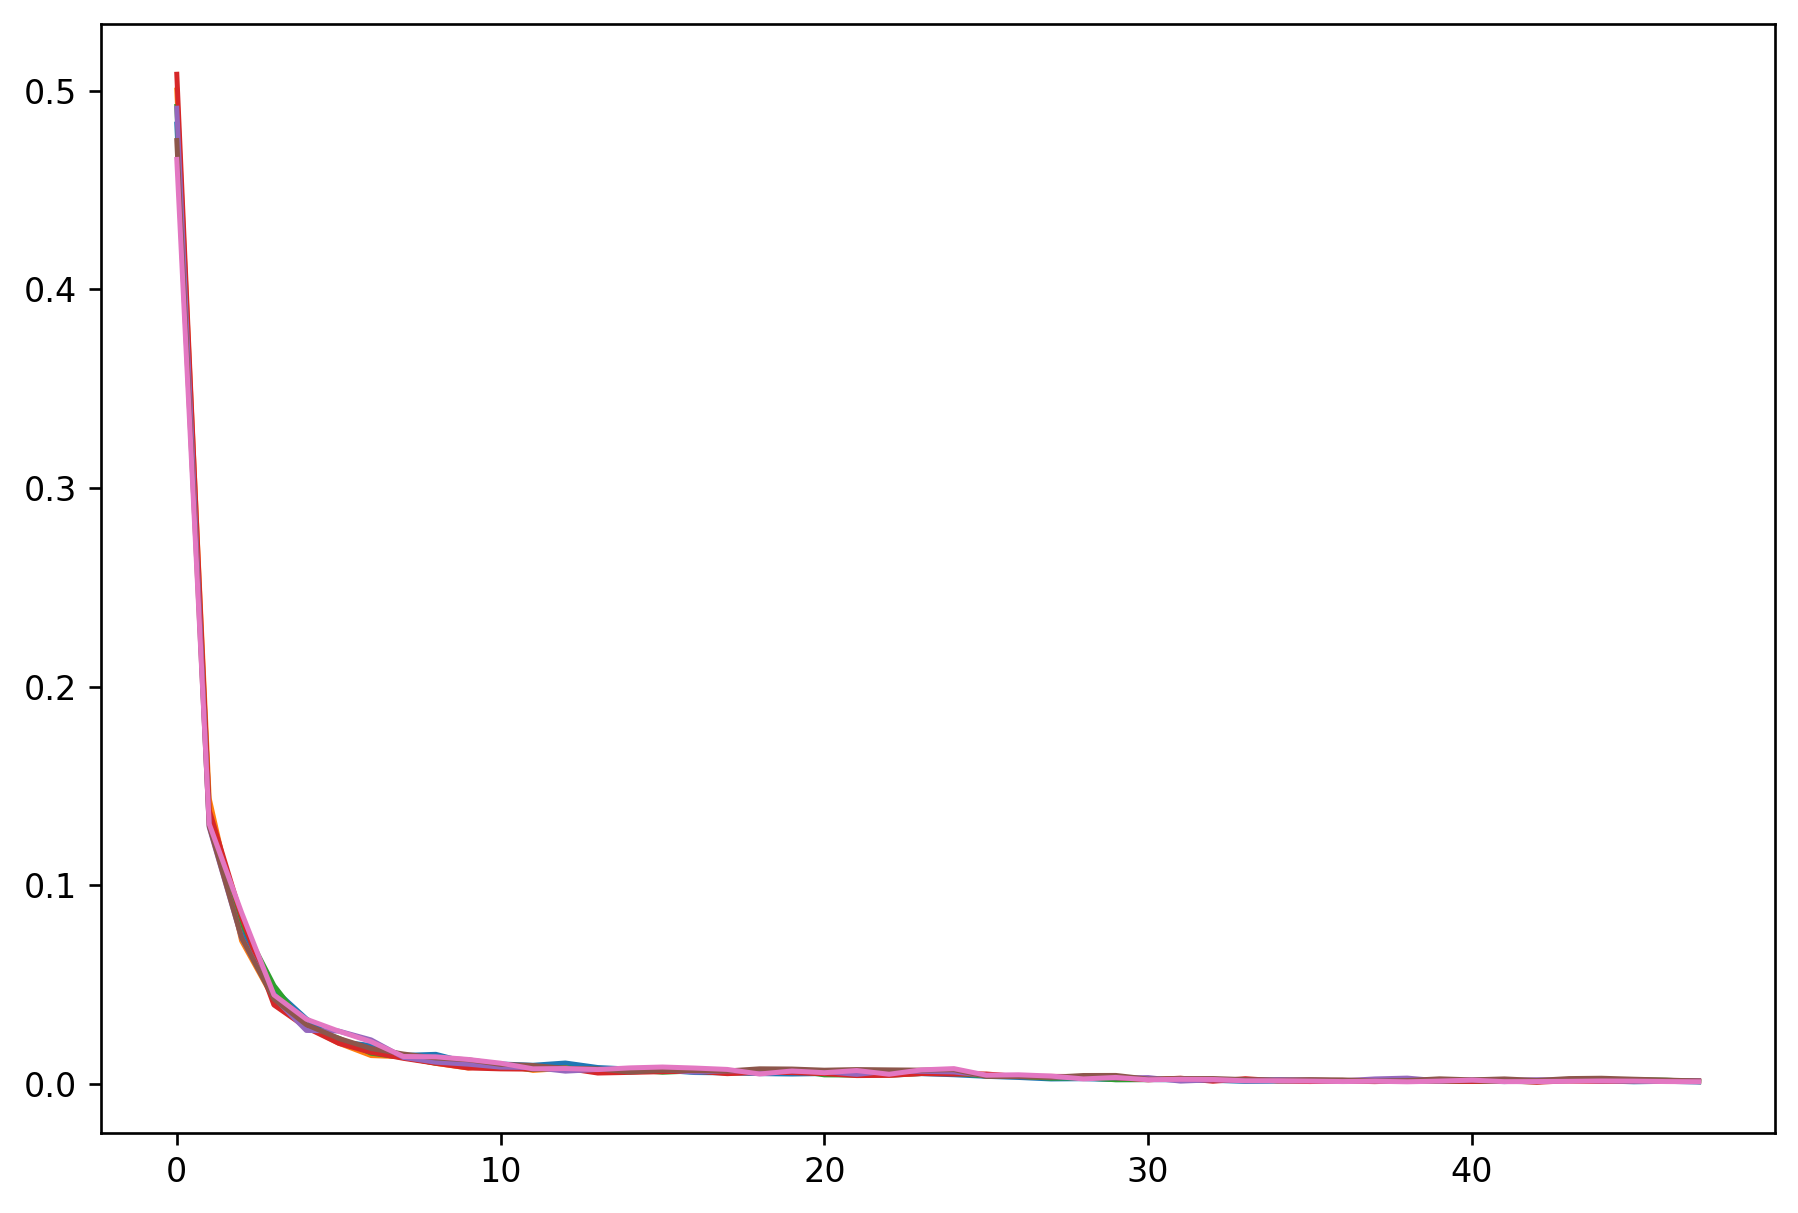

In [67]:
for _, row in mean_dist_by_day_of_week.iterrows():
    day, ys = row[0], row[1:]
    plt.plot(np.arange(48), ys)

plt.show();
    